### Modules

In [1]:
import archives_manager

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

pd.set_option('display.max_rows', None)
pd.set_option('display.width', 10000)

### Functions

In [3]:
def get_player_analysis(player_name, num_games):
    recent_archive = archives_manager.get_most_recent_games(player_name, num_games, filter_func=archives_manager.build_archive_filter(rated=True, exclude_draws=True, max_elo_diff=150))

    lst = []

    for archived_game in reversed(recent_archive):
        
        actual = archives_manager.get_won(archived_game, player_name)

        elo = archives_manager.get_elo(archived_game, player_name)

        lst.append({
            'player_elo': elo['Player'],
            'opp_elo': elo['Opponent'],
            'elo_diff': elo['Player'] - elo['Opponent'],
            'won': actual,
            
        })

    df = pd.DataFrame(lst)
    df['ma20'] = df['player_elo'].rolling(window=20).mean()
    df['ma5'] = df['player_elo'].rolling(window=5).mean()
    df['x-ma20'] = df['player_elo'] - df['ma20']
    df['x-ma5'] = df['player_elo'] - df['ma5']
    df['ma5-ma20'] = df['ma5'] - df['ma20']

    return df, recent_archive

### Data Gathering/Compiling

In [4]:
num_games_per_player = 1000

analyses = []
stats_list = []

players = [
    'BIG_TONKA_T',
    'UnderTheBeer',
    'Dandres0_0',
    #'Ale9800',
    #'MrOGH'
]

for player_name in players:
    df, recent_archive = get_player_analysis(player_name, num_games=num_games_per_player)
    
    player_info = {
        'Name': player_name,
        'Current Rating': archives_manager.get_elo(recent_archive[0], player_name)['Player'],
    }
    
    analyses.append({
        'player_name': player_name,
        'stats': player_info,
        'data': df,
        'archive': recent_archive
    })
    
data_list = [analysis['data'] for analysis in analyses]
df = pd.concat(data_list)
    
df = df.dropna().reset_index()

In [5]:
df

,index,player_elo,opp_elo,elo_diff,won,ma20,ma5,x-ma20,x-ma5,ma5-ma20
0,19,1294,1318,-24,1,1328.20,1304.2,-34.20,-10.2,-24.00
1,20,1286,1291,-5,1,1325.15,1299.2,-39.15,-13.2,-25.95
2,21,1294,1294,0,0,1322.15,1297.4,-28.15,-3.4,-24.75
3,22,1301,1343,-42,0,1319.90,1295.6,-18.90,5.4,-24.30
4,23,1293,1313,-20,1,1316.90,1293.6,-23.90,-0.6,-23.30
5,24,1284,1332,-48,1,1313.80,1291.6,-29.80,-7.6,-22.20
6,25,1293,1270,23,0,1311.55,1293.0,-18.55,0.0,-18.55
7,26,1300,1323,-23,0,1310.05,1294.2,-10.05,5.8,-15.85
8,27,1292,1287,5,1,1307.70,1292.4,-15.70,-0.4,-15.30
9,28,1284,1281,3,1,1305.35,1290.6,-21.35,-6.6,-14.75


### Logistic Regression

In [6]:
# using elo_diff to predict win/loss

X = df[['elo_diff']]  # Predictor
y = df['won']         # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.54      0.37      0.44       301
           1       0.51      0.68      0.58       288

    accuracy                           0.52       589
   macro avg       0.53      0.52      0.51       589
weighted avg       0.53      0.52      0.51       589



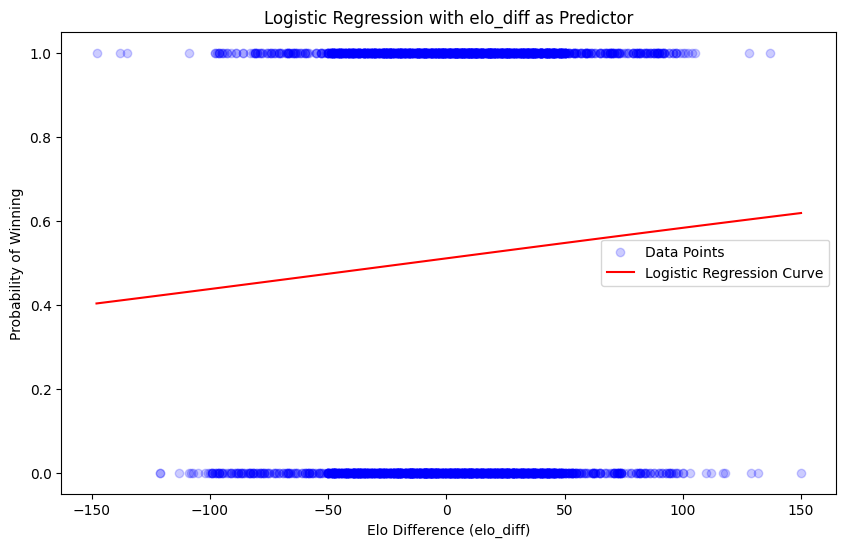

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Create a range of values for elo_diff to predict probabilities
elo_diff_range = np.linspace(df['elo_diff'].min(), df['elo_diff'].max(), 100)
elo_diff_range = elo_diff_range.reshape(-1, 1)

# convert range into a dataframe
elo_diff_df = pd.DataFrame(elo_diff_range, columns=['elo_diff'])

# Predict probabilities
probabilities = model.predict_proba(elo_diff_df)[:, 1]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['elo_diff'], df['won'], alpha=0.2, color='blue', label='Data Points')
plt.plot(elo_diff_range, probabilities, color='red', label='Logistic Regression Curve')
plt.title('Logistic Regression with elo_diff as Predictor')
plt.xlabel('Elo Difference (elo_diff)')
plt.ylabel('Probability of Winning')
plt.legend()
plt.show()

In [8]:
# using elo_diff and x-ma20 to predict win/loss

X = df[['elo_diff', 'x-ma20']]  # Predictors

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.64      0.60      0.62       301
           1       0.60      0.64      0.62       288

    accuracy                           0.62       589
   macro avg       0.62      0.62      0.62       589
weighted avg       0.62      0.62      0.62       589



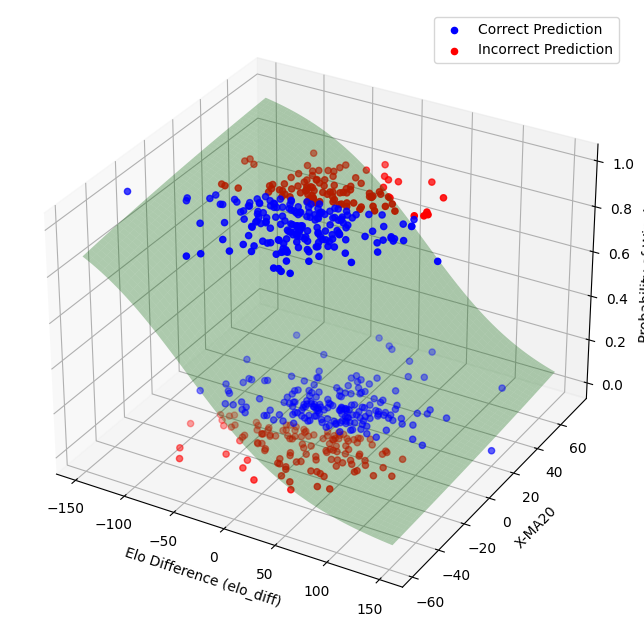

In [9]:
from mpl_toolkits.mplot3d import Axes3D

# Create the figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points - color by prediction correctness
# Blue for correct predictions, red for incorrect
correct_predictions = predictions == y_test
incorrect_predictions = predictions != y_test

ax.scatter(X_test.loc[correct_predictions, 'elo_diff'], X_test.loc[correct_predictions, 'x-ma20'], 
           y_test[correct_predictions], color='b', label='Correct Prediction')
ax.scatter(X_test.loc[incorrect_predictions, 'elo_diff'], X_test.loc[incorrect_predictions, 'x-ma20'], 
           y_test[incorrect_predictions], color='r', label='Incorrect Prediction')

# Create grid to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X_test['elo_diff'].min(), X_test['elo_diff'].max(), 100),
                     np.linspace(X_test['x-ma20'].min(), X_test['x-ma20'].max(), 100))

# Calculate the Z values (decision boundary) using only two coefficients
Z = model.intercept_ + model.coef_[0][0] * xx + model.coef_[0][1] * yy
Z = 1 / (1 + np.exp(-Z))  # Apply the sigmoid function

# Plot the decision boundary
# We might need to transpose Z depending on the shape of xx and yy
ax.plot_surface(xx, yy, Z.T, alpha=0.3, color='green')

# Labels and legend
ax.set_xlabel('Elo Difference (elo_diff)')
ax.set_ylabel('X-MA20')
ax.set_zlabel('Probability of Winning')
ax.legend()

plt.show()

In [10]:
# using elo_diff and x-ma5 to predict win/loss

X = df[['elo_diff', 'x-ma5']]  # Predictors

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       301
           1       0.80      0.81      0.81       288

    accuracy                           0.81       589
   macro avg       0.81      0.81      0.81       589
weighted avg       0.81      0.81      0.81       589



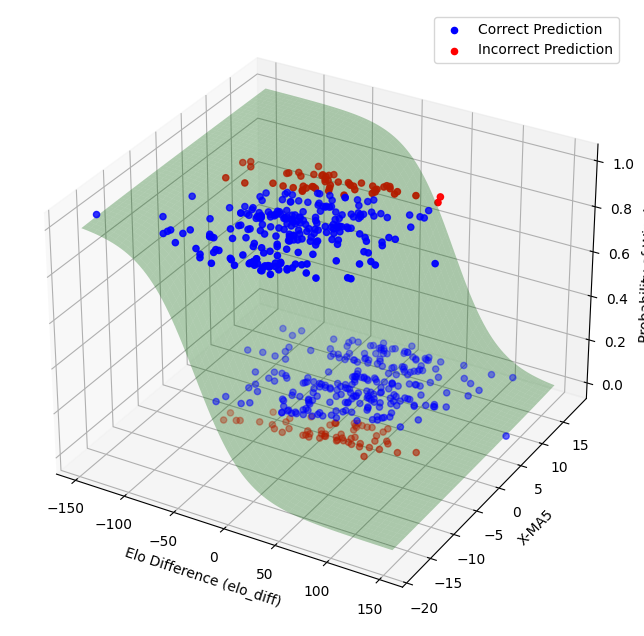

In [11]:
# Create the figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points - color by prediction correctness
# Blue for correct predictions, red for incorrect
correct_predictions = predictions == y_test
incorrect_predictions = predictions != y_test

ax.scatter(X_test.loc[correct_predictions, 'elo_diff'], X_test.loc[correct_predictions, 'x-ma5'], 
           y_test[correct_predictions], color='b', label='Correct Prediction')
ax.scatter(X_test.loc[incorrect_predictions, 'elo_diff'], X_test.loc[incorrect_predictions, 'x-ma5'], 
           y_test[incorrect_predictions], color='r', label='Incorrect Prediction')

# Create grid to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X_test['elo_diff'].min(), X_test['elo_diff'].max(), 100),
                     np.linspace(X_test['x-ma5'].min(), X_test['x-ma5'].max(), 100))

# Calculate the Z values (decision boundary) using only two coefficients
Z = model.intercept_ + model.coef_[0][0] * xx + model.coef_[0][1] * yy
Z = 1 / (1 + np.exp(-Z))  # Apply the sigmoid function

# Plot the decision boundary
# We might need to transpose Z depending on the shape of xx and yy
ax.plot_surface(xx, yy, Z.T, alpha=0.3, color='green')

# Labels and legend
ax.set_xlabel('Elo Difference (elo_diff)')
ax.set_ylabel('X-MA5')
ax.set_zlabel('Probability of Winning')
ax.legend()

plt.show()

In [12]:
# using elo_diff, x-ma20, x-ma5, x-ma20 and x-ma5 interaction to predict win/loss

df['interaction'] = df['x-ma20'] * df['x-ma5']
X = df[['elo_diff', 'x-ma20', 'x-ma5', 'interaction']]  # Predictors

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       301
           1       0.80      0.82      0.81       288

    accuracy                           0.81       589
   macro avg       0.81      0.81      0.81       589
weighted avg       0.81      0.81      0.81       589

